<a href="https://colab.research.google.com/github/shivendra1-cyber/HOUSE_PRICE_PREDICTION/blob/main/HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

#TIMPORTING THE DEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


importing the boston house price dataset


In [7]:
from sklearn.datasets import fetch_california_housing

In [13]:
from sklearn.datasets import fetch_california_housing

# Call the function to load the dataset
california_housing = fetch_california_housing()

print(california_housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [21]:

#loading dataset to pandas dataframe
house_price_dataframe = pd.DataFrame(california_housing.data,columns=california_housing.feature_names) # Use pd.DataFrame with capital 'D' and use california_housing variable


In [22]:
#print first 5 rows of dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
#checking the no of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 8)

In [25]:
#check for missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [27]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


understanding the correlation between various features of the dataset
1.positive correlation
2.negative correlation


In [28]:
correlation=house_price_dataframe.corr()

#constructiong a heat map to understand correlation

<Axes: >

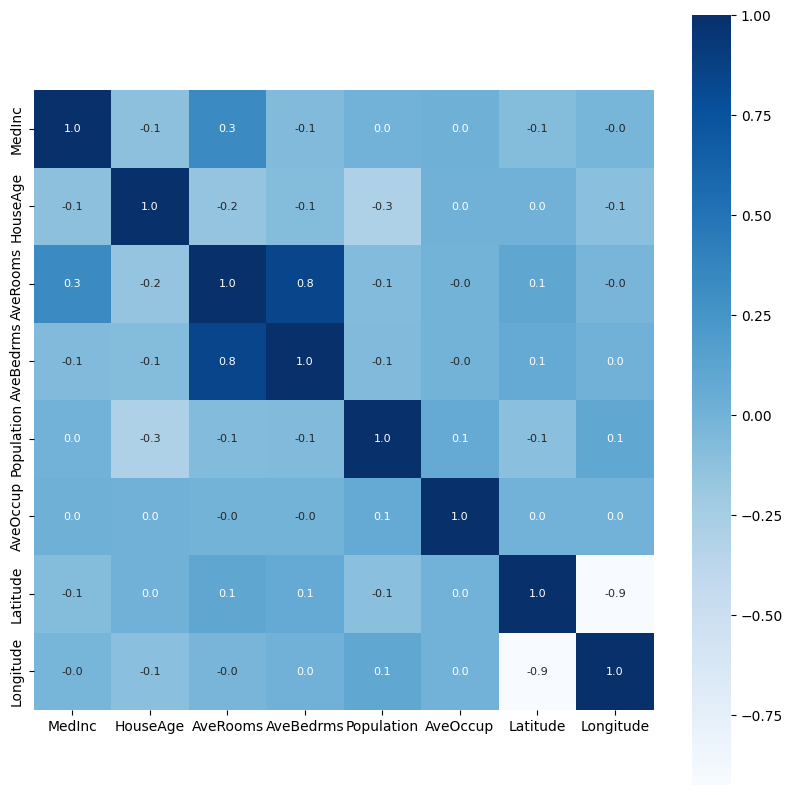

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

#splitting the data and target

In [44]:
# Assuming 'MedInc' is the target variable
X = house_price_dataframe.drop(columns=['MedInc'])  # Drop the target variable 'MedInc' from the features
Y = house_price_dataframe['MedInc']  # Set 'MedInc' as the target variable

# Splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Now you can proceed to train a model with X and Y
# For example, using XGBRegressor:
model = XGBRegressor()
model.fit(X_train, Y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
# Model Evaluation
# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model using metrics such as R-squared, Mean Squared Error, etc.
r2_score = metrics.r2_score(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)



In [46]:
print(f"R-squared: {r2_score}")
print(f"Mean Squared Error: {mse}")

# Further steps could include hyperparameter tuning, feature engineering, etc.

R-squared: 0.8044795741728923
Mean Squared Error: 0.7250399284153474


In [48]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, Y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

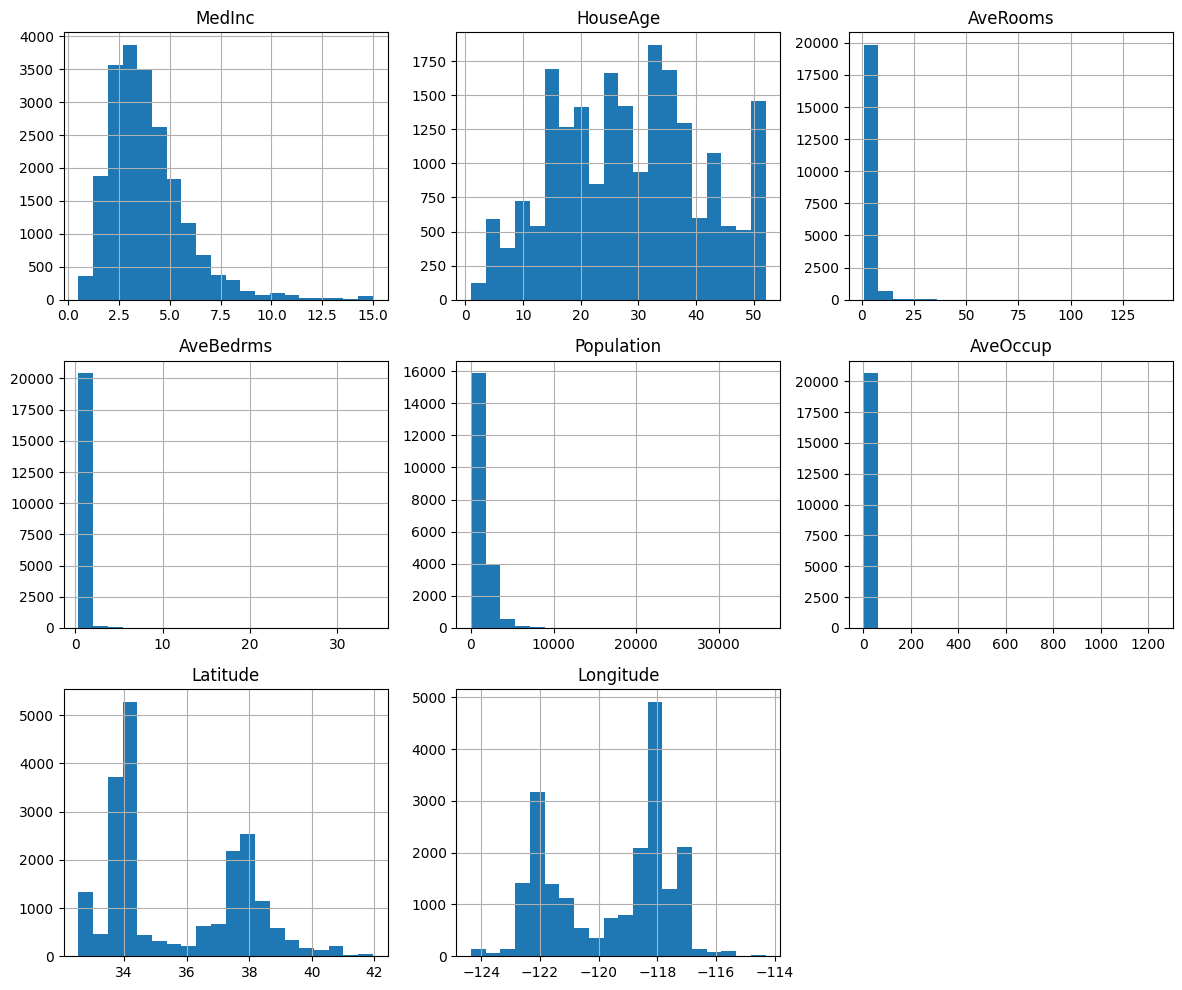

In [51]:
import matplotlib.pyplot as plt
house_price_dataframe.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

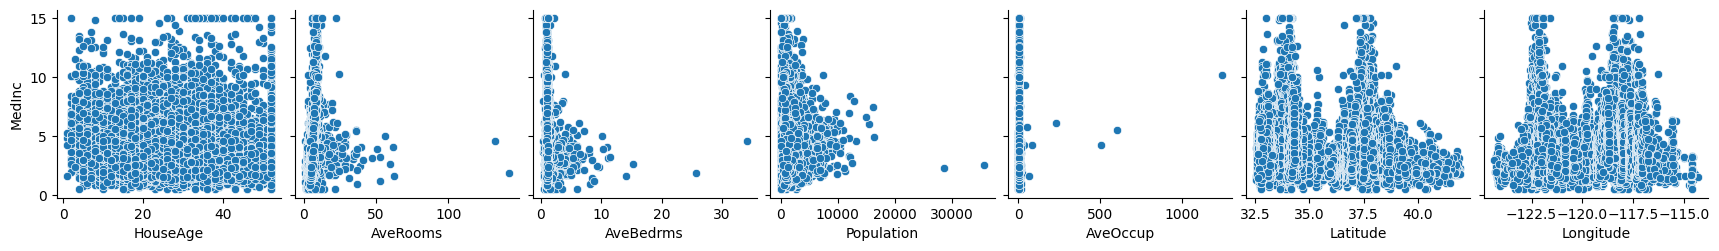

In [53]:
import seaborn as sns
sns.pairplot(house_price_dataframe, x_vars=['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], y_vars=['MedInc'])
plt.show()

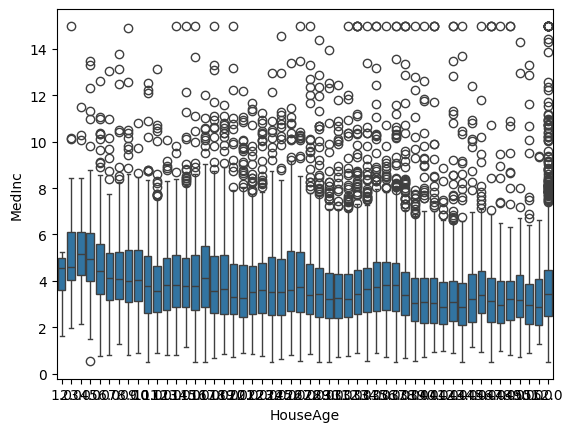

In [56]:
# Example: Box plot of 'MedInc' (Median Income) by 'HouseAge' (House Age)
sns.boxplot(x='HouseAge', y='MedInc', data=house_price_dataframe)
plt.show()

In [58]:
# 4. Outlier Detection (using IQR method)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_medinc = detect_outliers_iqr(house_price_dataframe, 'MedInc')
print("Outliers in MedInc:\n", outliers_medinc)

Outliers in MedInc:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1       8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
134     8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
135     8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   
...        ...       ...       ...        ...         ...       ...       ...   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20427   8.6499       4.0  7.236059   1.032528      5495.0  2.553439     34.19   
20428   8.7288       6.0  8.715842   1.102970      3385.0  3.351485     34.23   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
20503   8.2787      27.0  6.935065   1.103896       243.0  3.155844     34.33   

      

In [59]:
# 5. Data Cleaning (handling outliers - example for 'MedInc')
# You can choose to remove, impute, or keep outliers based on your analysis
# Here's an example of removing outliers:
house_price_dataframe_no_outliers = house_price_dataframe[~house_price_dataframe.index.isin(outliers_medinc.index)]

# 6. Feature Engineering (example - creating 'BedroomDensity')
house_price_dataframe['BedroomDensity'] = house_price_dataframe['AveBedrms'] / house_price_dataframe['AveRooms']



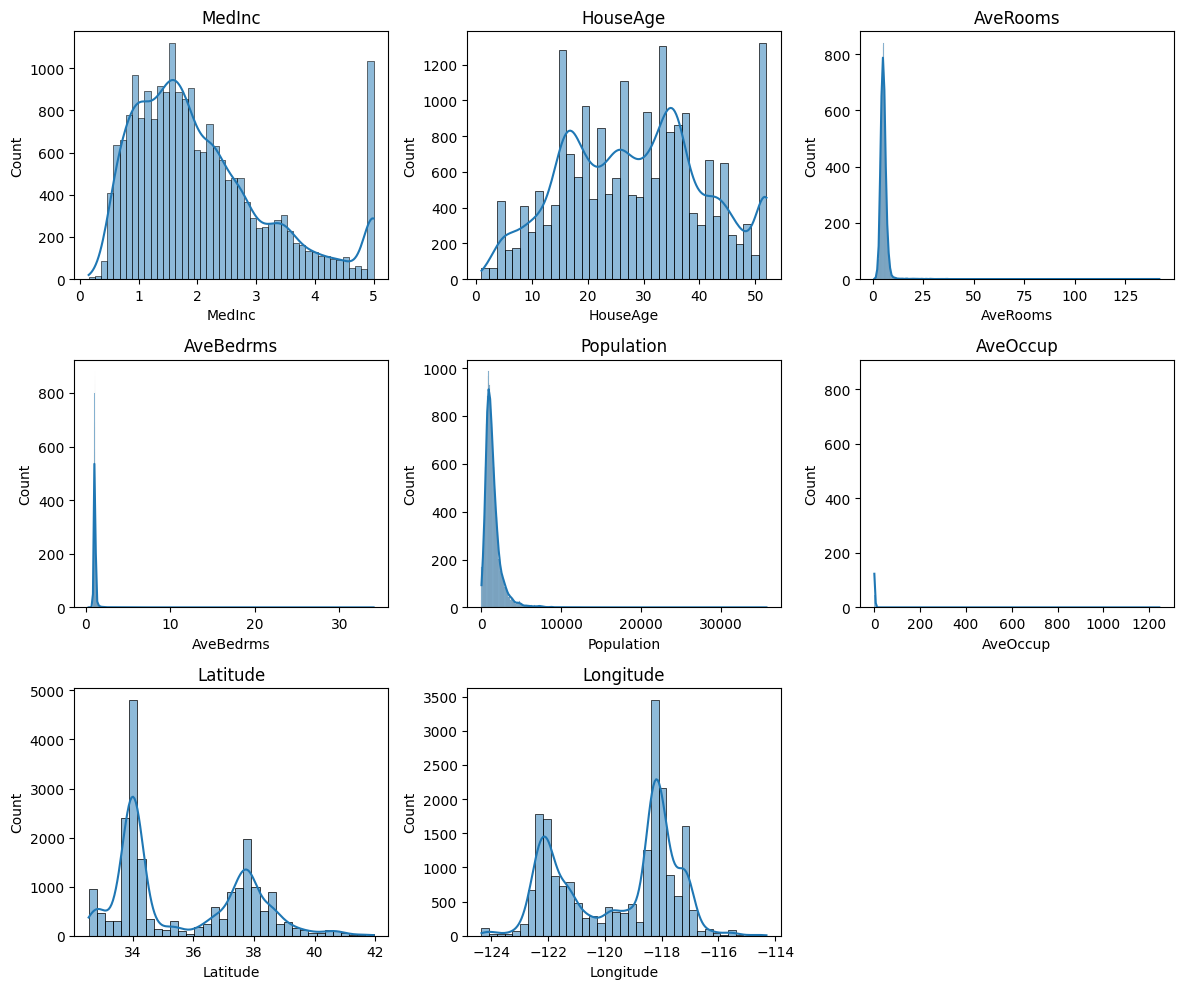

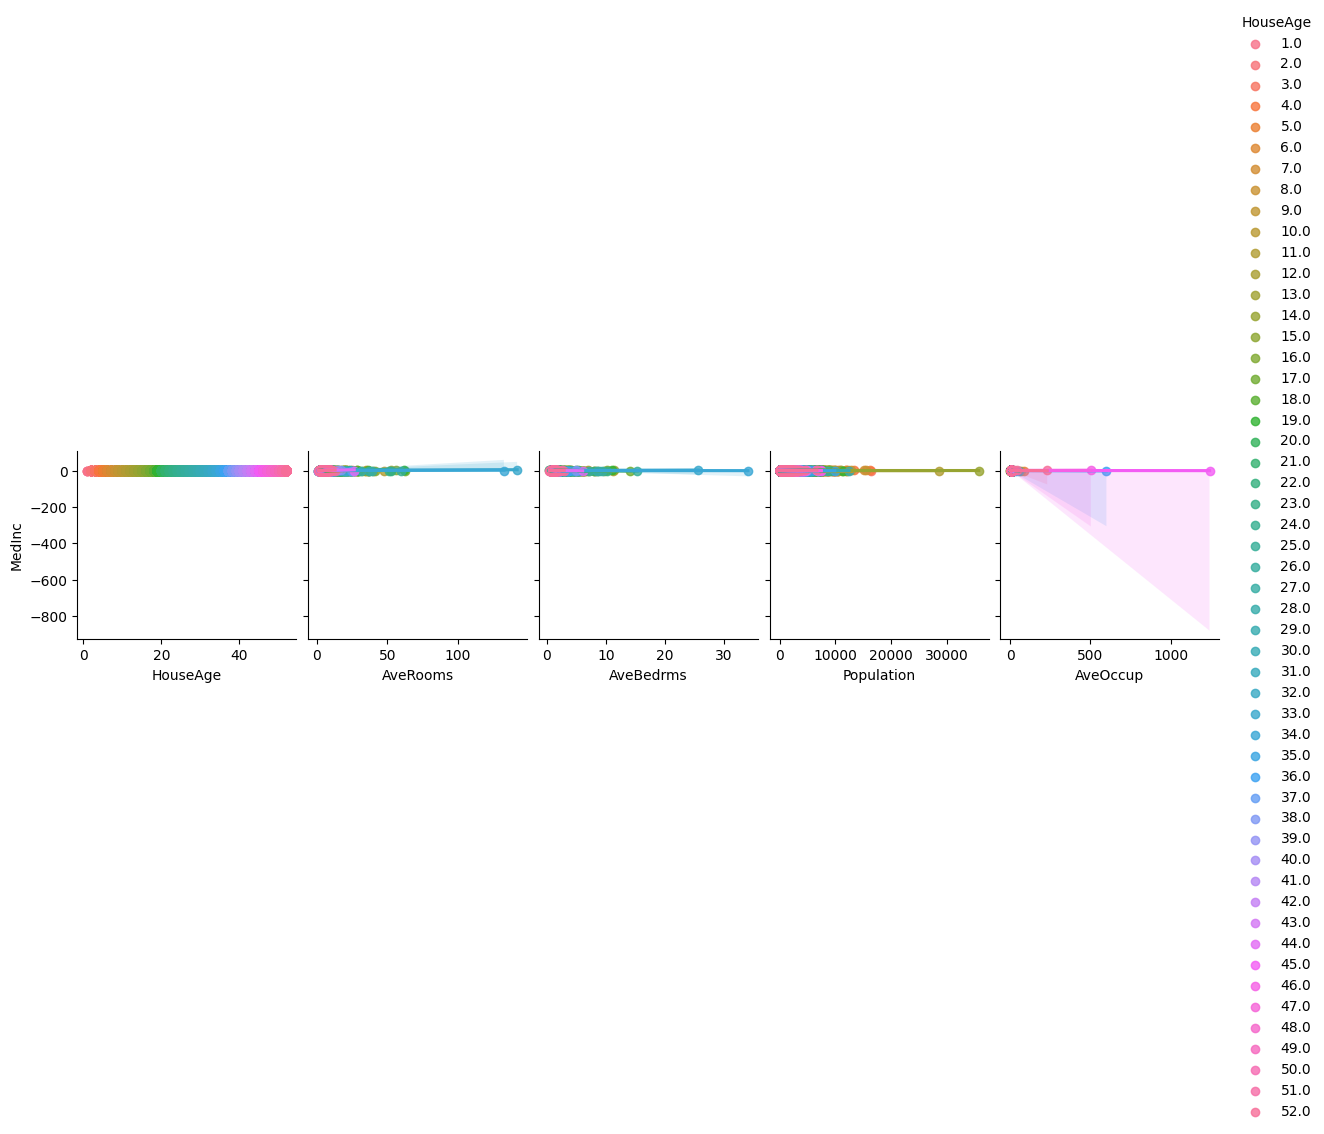

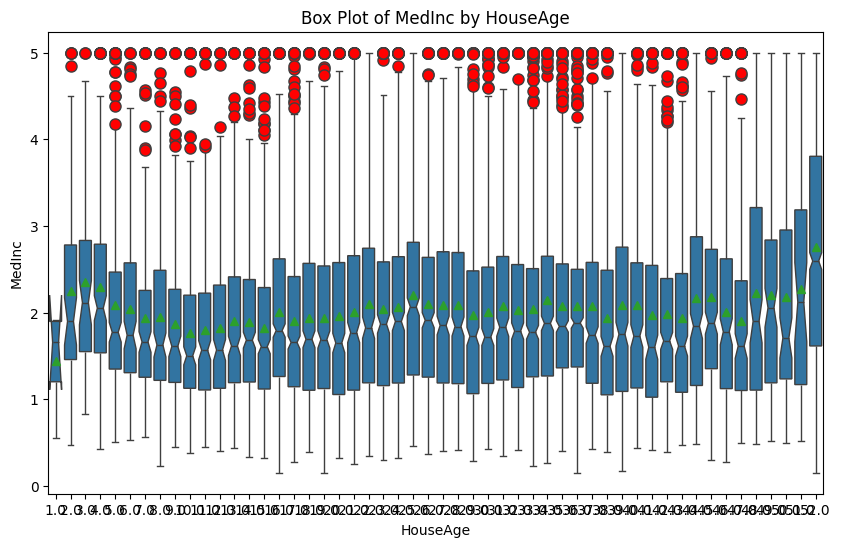

<ipython-input-60-b458382fbed8>:45: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='HouseAge', y='MedInc', data=house_price_dataframe,


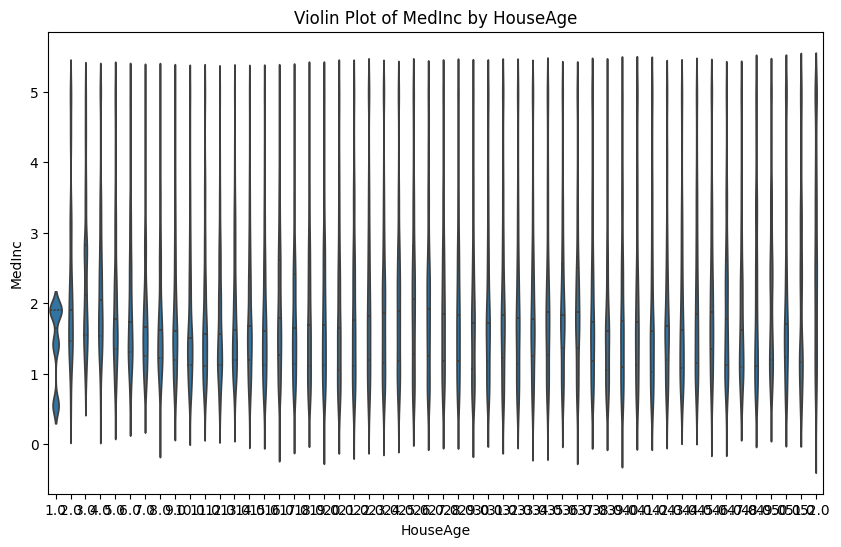

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2219: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


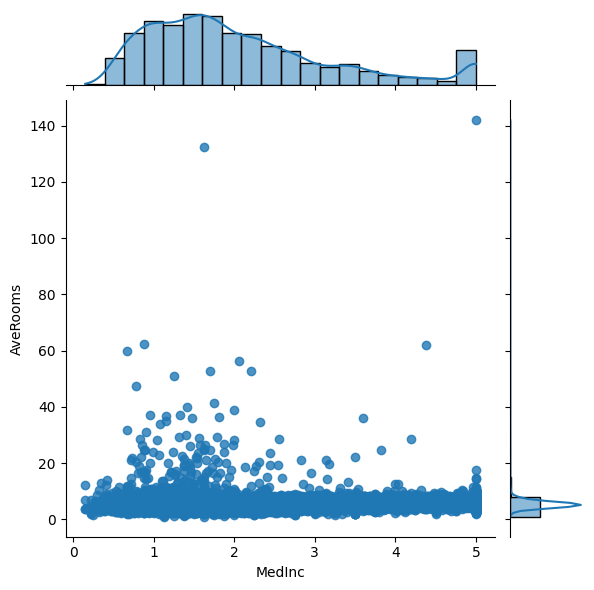

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california_housing = fetch_california_housing()
house_price_dataframe = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
house_price_dataframe['MedInc'] = california_housing.target  # Add target variable to DataFrame

# ... (previous code for descriptive statistics, correlation analysis, etc.) ...

# Enhanced Visualizations

# 1. Detailed Histograms with KDE
plt.figure(figsize=(12, 10))
for i, column in enumerate(house_price_dataframe.columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.histplot(house_price_dataframe[column], kde=True)  # Add KDE for smoother distribution
    plt.title(column)
plt.tight_layout()
plt.show()

# 2. Scatter Plots with Regression Lines and Hue
sns.pairplot(house_price_dataframe,
             x_vars=['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'],
             y_vars=['MedInc'],
             kind='reg',  # Add regression lines
             hue='HouseAge',  # Color points by HouseAge (or another feature)
             diag_kind='kde')  # Use KDE for diagonal plots
plt.show()

# 3. Box Plots with Outlier Markers and Notches
plt.figure(figsize=(10, 6))
sns.boxplot(x='HouseAge', y='MedInc', data=house_price_dataframe,
            showmeans=True,  # Show mean markers
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8},  # Customize outlier markers
            notch=True)  # Add notches for confidence intervals
plt.title("Box Plot of MedInc by HouseAge")
plt.show()

# 4. Violin Plots for Distribution Comparison
plt.figure(figsize=(10, 6))
sns.violinplot(x='HouseAge', y='MedInc', data=house_price_dataframe,
               inner='quartile',  # Show quartiles inside the violin
               bw=.2)  # Adjust bandwidth for smoother curves
plt.title("Violin Plot of MedInc by HouseAge")
plt.show()

# 5. Joint Plots for Bivariate Analysis
sns.jointplot(x='MedInc', y='AveRooms', data=house_price_dataframe,
              kind='reg',  # Add regression line and marginal distributions
              marginal_kws=dict(bins=20, rug=True))  # Customize marginal plots
plt.show()

# ... (other visualizations and EDA steps) ...